# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain yourself the purposes of the project and actions you plan to take.]

It says "You need to study data collected over the last few years and determine which factors influence the price of a vehicle." There for I need to see the prices of vehicles and reach a conclusion.

[Please bear in mind that studying, amending and analyzing data is an iterative process. It is normal to return back to previous steps and correct/expand them to allow for further steps.]

## Initialization

[Load libraries that you believe are required for the project. You may realise later that you need additional libraries as you go, which is totally fine - just make sure to update this section when you do.]

In [1]:
# Loading all the libraries
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt


### Load data

[Load the project data and have a look at the general information.]

In [2]:
# Load the data file into a DataFrame
try:
    crankshaft = pd.read_csv('/datasets/vehicles_us.csv')
except:
    crankshaft = pd.read_csv('C:/Users/Lorenzo Santos/OneDrive/Documents/vehicles_us.csv')
    #added because I worked locally, because I sent the wrong version earlier 

old_crankshaft = crankshaft #for comparison later

### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

[Understanding the fields, explore them to make yourself familiar with the data.]

In [3]:
# print the general/summary information about the DataFrame

crankshaft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
crankshaft.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


[Describe what you notice in the general information and the printed data sample. Are there any issues that may need further investigation and changes?]

Some NaNs.

In [5]:
crankshaft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


[Are there columns with inappropriate data types?]

model_year and odometer and cylinders should be int. us_4wd should be yes or no. SUV in type should be lowercase.

In [6]:
#
#https://pastebin.com/j3YZjwZe
print(crankshaft['model_year'].head(10))
print(crankshaft['cylinders'].head(10))
print(crankshaft['is_4wd'].head(10))
print(crankshaft['type'].head(10))

0    2011.0
1       NaN
2    2013.0
3    2003.0
4    2017.0
5    2014.0
6    2015.0
7    2013.0
8    2012.0
9    2008.0
Name: model_year, dtype: float64
0    6.0
1    6.0
2    4.0
3    8.0
4    4.0
5    6.0
6    4.0
7    6.0
8    4.0
9    NaN
Name: cylinders, dtype: float64
0    1.0
1    1.0
2    NaN
3    NaN
4    NaN
5    1.0
6    NaN
7    1.0
8    1.0
9    1.0
Name: is_4wd, dtype: float64
0       SUV
1    pickup
2     sedan
3    pickup
4     sedan
5     sedan
6     sedan
7       SUV
8       SUV
9       SUV
Name: type, dtype: object


years as float makes no sense, could even be date time. cylinders as float makes no sense either. is_4wd should be yes or no. all type should be lowercase.

[Are there missing values across all columns or just a few? What columns contain the most missing values? Briefly describe what you see in 1-2 sentences.]

Yes. model_year. paint_color. odometer. cylinders. is_4wd.

In [7]:
#
#https://pastebin.com/shYaGMAD
try: #wasn't working locally so I improvised.
    print(crankshaft.query('model_year.notna() == True').shape[0])
    print(crankshaft.query('paint_color.notna() == True').shape[0])
    print(crankshaft.query('odometer.notna() == True').shape[0])
    print(crankshaft.query('is_4wd.notna() == True').shape[0]) 
except:
    print(crankshaft[crankshaft['model_year'].notna() == True].shape[0])
    print(crankshaft[crankshaft['paint_color'].notna() == True].shape[0])
    print(crankshaft[crankshaft['odometer'].notna() == True].shape[0])
    print(crankshaft[crankshaft['is_4wd'].notna() == True].shape[0])
print(crankshaft.shape[0])



47906
42258
43633
25572
51525


model_year is: 47906

paint_color is: 42258

odometer is: 43633

cylinders is: 25572

All should be the same amount as the total... which is: 51525, which means they're missing.

### Conclusions and further steps

[Formulate your conclusions regarding the initial data. What do you think looks normal and what does not not?]

All should be the same amount as the total... but they're not which means they're missing.

[Explain your next steps and how they correlate with the conclusions you made so far. Specifically, it should be clear what part of data should be treated to make it more suitable for the required analysis.]

We need to fill or cut out data and fix data types.

In [8]:
crankshaft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


## Treat missing values (if any)

[Study missing values for each column in more details and decide what to do with them based on meaningful hypotheses.]

In [9]:
#https://pastebin.com/GsHtB5AD 
#https://pastebin.com/eybCUXVi
#https://pastebin.com/Nda6z8Jn
#https://pastebin.com/sgPGdnrN
#https://pastebin.com/6eA9hJCY
#previous versions.

#We'll operate under the assumption that the majority of them have outliers.
print(crankshaft.corr())
#Price and mileage correlate with the condition of a model.
#The number of cylinders and year with its model

 
#print(df['condition'].value_counts())
list_of_conditions = list(dict(crankshaft['condition'].value_counts()))
list_of_models = list(dict(crankshaft['model'].value_counts()))
#print(list_of_unique_models)
 
for condition in list_of_conditions:
    price_median = crankshaft[crankshaft['condition'] == condition]['price'].median()
    crankshaft.loc[(crankshaft['condition'] == condition) & (crankshaft['price'].isna() == True),'price'] = price_median
    mileage_median = crankshaft[crankshaft['condition'] == condition]['odometer'].median()
    crankshaft.loc[(crankshaft['condition'] == condition) & (crankshaft['odometer'].isna() == True),'odometer'] = mileage_median
 
for model in list_of_models:
    cylinder_median = crankshaft[crankshaft['model'] == model]['cylinders'].median()
    crankshaft.loc[(crankshaft['model'] == model) & (crankshaft['cylinders'].isna() == True),'cylinders'] = cylinder_median
    year_median = crankshaft[crankshaft['model'] == model]['model_year'].median()
    crankshaft.loc[(crankshaft['model'] == model) & (crankshaft['model_year'].isna() == True),'model_year'] = year_median
 
crankshaft['is_4wd'] = crankshaft['is_4wd'].fillna(0.0) #boolean fill
crankshaft = crankshaft.dropna(subset=['paint_color']).reset_index(drop=True) 
 
print(crankshaft.head(20))

                price  model_year  cylinders  odometer  is_4wd  days_listed
price        1.000000    0.428656   0.296627 -0.420299     NaN    -0.000682
model_year   0.428656    1.000000  -0.148040 -0.473948     NaN    -0.005703
cylinders    0.296627   -0.148040   1.000000  0.090160     NaN     0.005517
odometer    -0.420299   -0.473948   0.090160  1.000000     NaN     0.003804
is_4wd            NaN         NaN        NaN       NaN     NaN          NaN
days_listed -0.000682   -0.005703   0.005517  0.003804     NaN     1.000000
      price  model_year                     model  condition  cylinders fuel  \
0   25500.0      2011.0                ford f-150       good        6.0  gas   
1    5500.0      2013.0            hyundai sonata   like new        4.0  gas   
2   14900.0      2017.0              chrysler 200  excellent        4.0  gas   
3   14990.0      2014.0              chrysler 300  excellent        6.0  gas   
4   12990.0      2015.0              toyota camry  excellent        

More often than not (except for is_4wd and paint color), according to the correlation matrix, we can just make a median and put it in.

Instead of doing extensive research on each model's paint color which could be anything, we'll just cut them out. Like the Gordian Knot. It seems NaN meets no on is_4wd. So we'll make it 0.0 and change type later.

## Fix data types

[As the data is more or less complete now, fix the data types if required.]

In [10]:
#https://pastebin.com/kwMdK9k7
crankshaft['model_year'] = crankshaft['model_year'].astype('int')
crankshaft['cylinders'] = crankshaft['cylinders'].astype('int')
crankshaft['odometer'] = crankshaft['odometer'].astype('int')

def yes_no(value):
    if value > 0.0:
        return 'yes'
    else:
        return 'no'
    
crankshaft['is_4wd'] = crankshaft['is_4wd'].apply(yes_no)
    
def downsize(value):
    value = value.lower()
    return value

crankshaft['type'] = crankshaft['type'].apply(downsize)

Changed some things to int, they look better that way and most odometers don't have decimals, so it's better to assume they don't. I also changed the the 1's and 0's to yes and no in is_4wd and downsized the type; snake_case style.

## Enrich data

[Add additional factors to the data to make the analysis easier.]

In [11]:
# Add datetime values for when the ad was placed
crankshaft['date_posted'] = pd.to_datetime(crankshaft['date_posted'], format='%Y-%m-%d')
#crankshaft.info()

In [12]:
# Add the vehicle's age when the ad was placed
#https://pastebin.com/AdfJt23x #notes
#https://pastebin.com/4YYHqADy
#https://pastebin.com/hrDdF8Kq

crankshaft['model_year'] = pd.to_datetime(crankshaft['model_year'], format='%Y')
crankshaft['model_year'] = crankshaft['model_year'].dt.year.astype(int)
crankshaft['days_listed'] = pd.to_timedelta(crankshaft['days_listed'], unit='D') #https://stackoverflow.com/questions/34519536/convert-integer-series-to-timedelta-in-pandas
crankshaft['current_date'] = crankshaft['date_posted'] + crankshaft['days_listed']
crankshaft['days_listed'] = crankshaft['days_listed'].dt.days.astype('int')
crankshaft['year_posted'] = crankshaft['current_date'].dt.year.astype(int) 
crankshaft['model_age'] = crankshaft['year_posted'] - crankshaft['model_year']
crankshaft = crankshaft.drop(columns=['year_posted'])

I changed model year to int. 
Year posted needs to be made to calculate age but I needed to get the current year first.
I changed days listed to timedelta, add to current date:
Then I changed this back to ints and dropped year posted because I didn't need it anymore.


In [13]:
# Add the vehicle's average mileage per year
#https://pastebin.com/sRZU6p9a
#https://pastebin.com/0zzcJRpe

crankshaft['mileage_per_year'] = crankshaft['odometer'] / crankshaft['model_age'] + 1 #Most cars aren't brand new, but actually 1 year from rollout
crankshaft['mileage_per_year'] = crankshaft['mileage_per_year'].replace(np.inf, np.nan).fillna(0.0).astype('int')

To get mileage per year I divided odometer by model_age. Then, dividing by zero creates inf (infinite) values, so I replaced the inf values with NaNs then filled it.

In [14]:
# It might help to replace the condition values with something that can be manipulated more easily
#notes https://pastebin.com/WEx6VAKs

def five_star_grading(car): 
    if 'new' == car:
        car = 5
        return int(car)
    if 'like new' == car: 
        car = 4
        return int(car)
    if 'excellent' == car:
        car = 3
        return int(car)
    if 'good' == car:
        car = 2
        return int(car)
    if 'fair' == car:
        car = 1
        return int(car)
    if 'salvage' == car:
        car = 0
        return int(car)

crankshaft['condition'] = crankshaft['condition'].apply(five_star_grading)

## Check clean data

[Given the data is ready for the analysis, take just another quick look at it. It is helpful to see what exactly you are going to use for the analysis.]

In [15]:
# print the general/summary information about the DataFrame
#https://pastebin.com/aJQwA6rb
print(crankshaft.info())
print()
print(old_crankshaft.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42258 entries, 0 to 42257
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             42258 non-null  float64       
 1   model_year        42258 non-null  int64         
 2   model             42258 non-null  object        
 3   condition         42258 non-null  int64         
 4   cylinders         42258 non-null  int64         
 5   fuel              42258 non-null  object        
 6   odometer          42258 non-null  int64         
 7   transmission      42258 non-null  object        
 8   type              42258 non-null  object        
 9   paint_color       42258 non-null  object        
 10  is_4wd            42258 non-null  object        
 11  date_posted       42258 non-null  datetime64[ns]
 12  days_listed       42258 non-null  int64         
 13  current_date      42258 non-null  datetime64[ns]
 14  model_age         4225

I removed missing with missing values, and filled is_4wd

In [16]:
# print a sample of data
#https://pastebin.com/gnKN58cG
print(crankshaft.head(10))
print()
print(old_crankshaft.head(10))

     price  model_year                     model  condition  cylinders fuel  \
0  25500.0        2011                ford f-150          2          6  gas   
1   5500.0        2013            hyundai sonata          4          4  gas   
2  14900.0        2017              chrysler 200          3          4  gas   
3  14990.0        2014              chrysler 300          3          6  gas   
4  12990.0        2015              toyota camry          3          4  gas   
5  15990.0        2013               honda pilot          3          6  gas   
6   9200.0        2008               honda pilot          3          6  gas   
7  19500.0        2011  chevrolet silverado 1500          3          8  gas   
8   8990.0        2012              honda accord          3          4  gas   
9  16500.0        2018            hyundai sonata          3          4  gas   

   odometer transmission    type paint_color is_4wd date_posted  days_listed  \
0     88705    automatic  pickup       white    ye

In summary, I removed missing with missing values, and filled is_4wd, and added mileage_per_year and model_age



## Study core parameters

[Choose an appropriate approach to study the parameters listed below, pay special attention to how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

[If you find that you need to repeat the same jobs multiple times, think about what coding instrument might be helpful for such a thing to avoid duplicating your code.]

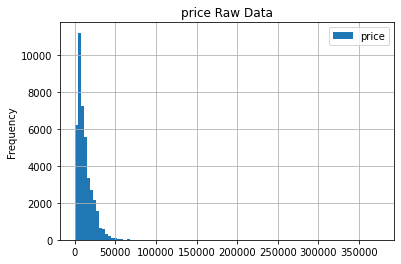

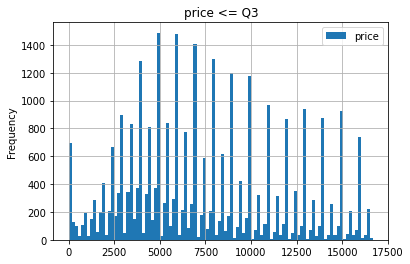

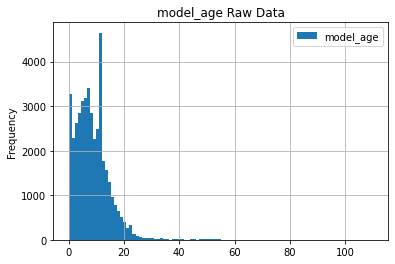

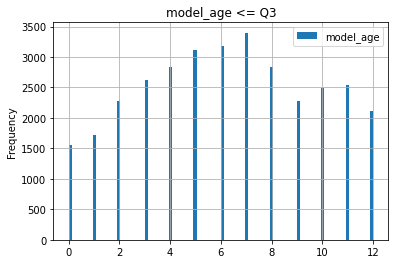

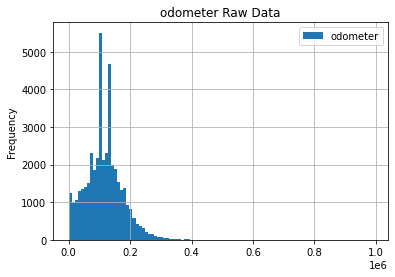

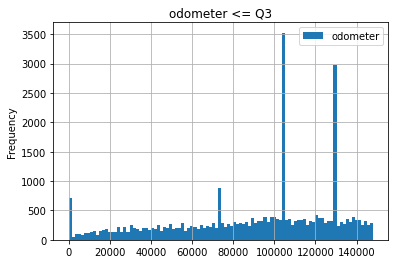

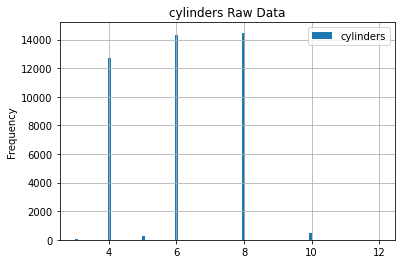

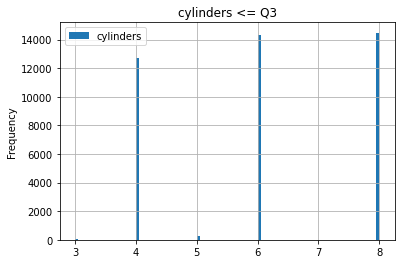

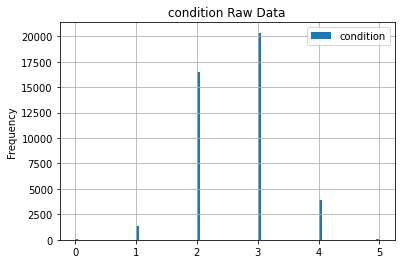

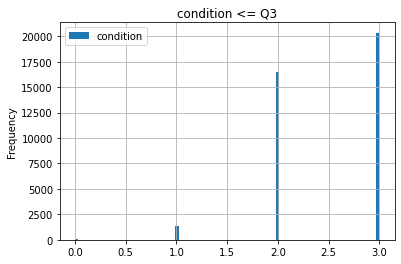

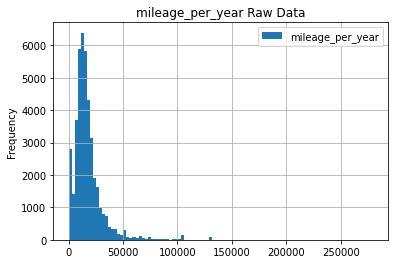

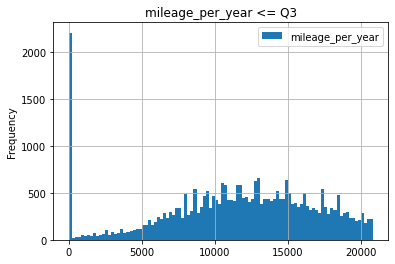

In [17]:
#notes
#https://pastebin.com/TmyyY7fn
#https://pastebin.com/uEiTcav7
#https://pastebin.com/BCgwsVkn

columns_to_use = ['price','model_age','odometer','cylinders','condition','mileage_per_year']


def histomaker(a_list,df):
    for column in a_list:
        value_count = df[f"{column}"].value_counts()
        #print(df[f"{column}"].describe()) #according to this majority of outliers are past Q3. 
        Q1 = df[f"{column}"].quantile(0.25)
        Q3 = df[f"{column}"].quantile(0.75)
        IQR = Q3 - Q1
        max_of_column = df[f"{column}"].max()
        min_of_column = df[f"{column}"].min()
        df[f'{column}'].plot(range=(min_of_column,max_of_column),bins=100,kind='hist',grid=True,legend=True,title=f'{column} Raw Data')
        plt.show()
        df[f'{column}'].plot(range=(min_of_column,Q3),bins=100,kind='hist',grid=True,legend=True,title=f'{column} <= Q3')
        plt.show()

        
        
histomaker(columns_to_use,crankshaft)

The majority of outliers are past Q3, around the max, with the exception of model_age having a minimum of 1908. The outliers make it harder to see the preferences buying frequency do to the range being stretched. But overall, removing outliers makes it much easier to read.


## Study and treat outliers

[Given the results above, determine what columns may contain outliers, and create a DataFrame without those outliers. Hint: Outliers can be identified by defining the lower/upper limits for normal range of values.]

We'll use boxplots to find where they group the most for outliers



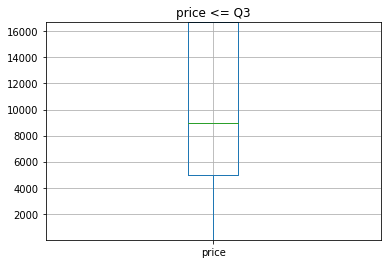

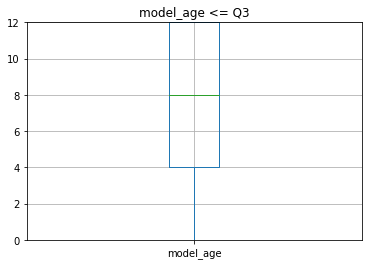

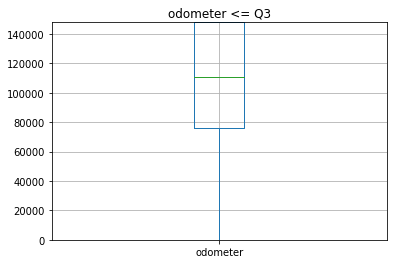

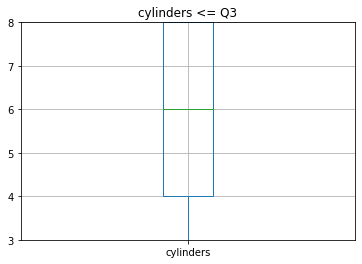

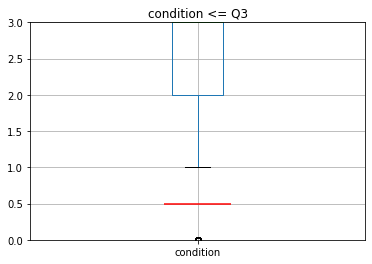

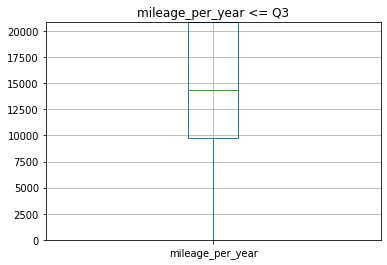

In [18]:
# Determine the lower limits for outliers
#https://pastebin.com/jfbGrQpz

print("We'll use boxplots to find where they group the most for outliers")
print()

def boxplot_this(a_list,df):
    for column in a_list:
        Q1 = df[f"{column}"].quantile(0.25) 
        Q3 = df[f"{column}"].quantile(0.75)
        IQR = Q3 - Q1
        max_of_column = df[f"{column}"].max()
        min_of_column = df[f"{column}"].min()
        #print(df[f'{column}'].describe()) #Not needed, but can be used for later
        df.boxplot(column=f'{column}')
        plt.hlines(y=Q1 - 1.5*IQR, xmin=0.9, xmax=1.1, color='red')
        plt.hlines(y=Q3 + 1.5*IQR, xmin=0.9, xmax=1.1, color='red')
        plt.ylim(min_of_column, Q3)
        plt.title(f'{column} <= Q3')
        plt.show()
        

boxplot_this(columns_to_use,crankshaft)

# Lower limit for condition = 1, lower limit for cylinders = 4, lower limit for age = 0, for price = 1000 otherwise we're losing money, mileage = 0  


In [19]:
# Determine the upper limits for outliers
#Upper limit for condition = 4, upper limit for cylinders = 8, upper limit for age = 20, for price = 32000, mileage = 240000


In [20]:
# Store data without outliers in a separate DataFrame
#https://pastebin.com/6Fnvi4pK
crank = crankshaft.query('(0 <= odometer <= 24000) and (0 <= odometer <= 24000) and (1000 <= price <= 32000) and (1000 <= price <= 32000) and (4 <= cylinders <= 8) and (1 <= condition <= 4)').reset_index(drop=True)

I've set the lower limits for condition to be 1 because most people don't want to buy scrap. I set price to 1000 because I assume most people want at least 1000 for a car. I set most upper limits around Q3 because the majority of people want low to medium everything else besides condition.

## Study core parameters without outliers

[Use the filtered data to make new plots. Compare with the earlier ones (that included outliers). Draw conclusions for each.]

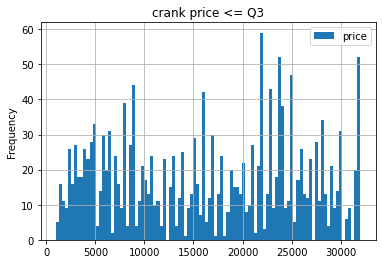

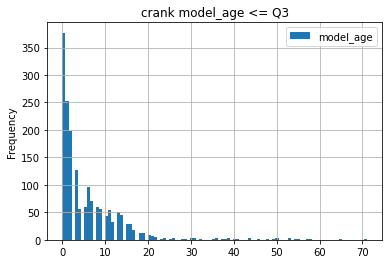

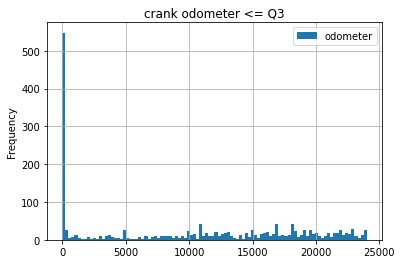

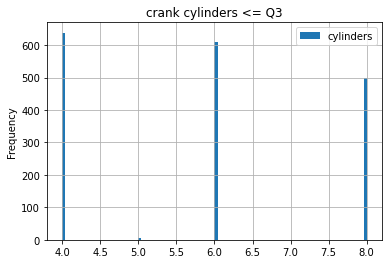

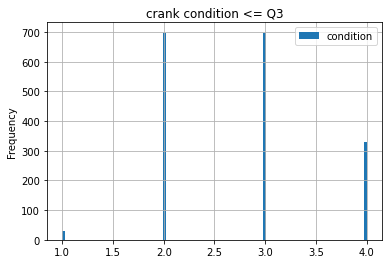

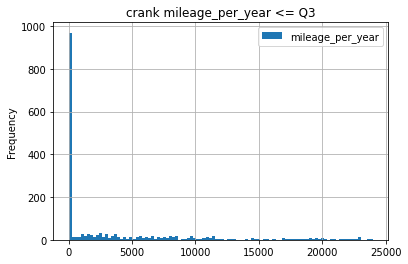

AxesSubplot(0.125,0.125;0.775x0.755)


Text(0.5, 1.0, 'odometer under 100')

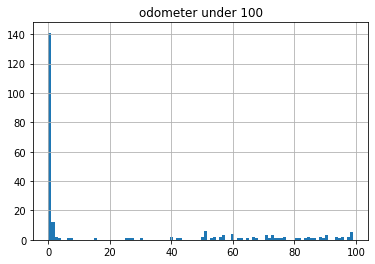

In [21]:
#we changed the histomaker this time to read without outliers
#https://pastebin.com/rnKf3Rf2

def histomaker(a_list,df):
    for column in a_list:
        value_count = df[f"{column}"].value_counts()
        max_of_column = df[f"{column}"].max()
        min_of_column = df[f"{column}"].min()
        df[f'{column}'].plot(range=(min_of_column,max_of_column),bins=100,kind='hist',grid=True,legend=True,title=f'crank {column} <= Q3')
        plt.show()

        

histomaker(columns_to_use,crank)
print(crank[crank['odometer']<100]['odometer'].hist(bins=100))
plt.title('odometer under 100')

According to most of the graphs, so far people prefer, in laymans terms a cheap, newer, with low mileage car. most cars in sold are new to 2 years old

Majority of people buy between the price of 0-10000 on vehicles and 20000-30000.
Most people buy 6 cylinders or 4 cylinders, and rarely 5 cylinders.
Most cars are good or excelent.
Majority buy brand new cars at a model_age of 0. As the model_age increases, the frequency of the car be being bought decreases. Even zoomed in 0 is the popular choice.
Beyond 0 mileage, there is a drastic drop in the frequency of cars

## Ads lifetime

[Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.]

AxesSubplot(0.125,0.125;0.775x0.755)

mean would be 39 days
median would be 33 days
every ad above 80 days would be considered abnormally long
every ad before 25 days would be considered removed quick
average lifetime of ads are around 20-50 days


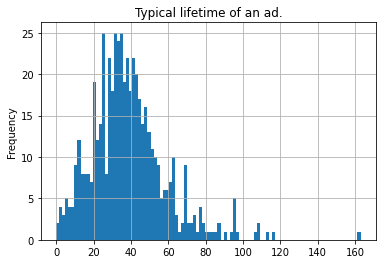

In [22]:

just_ads = ['days_listed']
#histomaker(just_ads,crank)
crank_ads = crank.pivot_table(index='price',values='days_listed')
Q1 = crank_ads['days_listed'].quantile(0.25) 
Q3 = crank_ads['days_listed'].quantile(0.75)
IQR = Q3 - Q1
print(crank_ads['days_listed'].plot(range=(crank_ads['days_listed'].min(),crank_ads['days_listed'].max()),bins=100,kind='hist',grid=True,title='Typical lifetime of an ad.'))
print()
print('mean would be 39 days')
print('median would be 33 days')
print('every ad above 80 days would be considered abnormally long')
print('every ad before 25 days would be considered removed quick')
print('average lifetime of ads are around 20-50 days')
   
    
    
    

average lifetime of ads are around 20-50 days


## Average price per each type of vehicle

[Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.]

                  avg
type                 
bus          28990.00
convertible  21683.27
coupe        22410.86
hatchback    10830.77
mini-van     13968.82
offroad      21040.00
other        11235.45
pickup       21259.89
sedan        11248.32
suv          14256.41
truck        18846.26
van          22732.50
wagon        10961.27


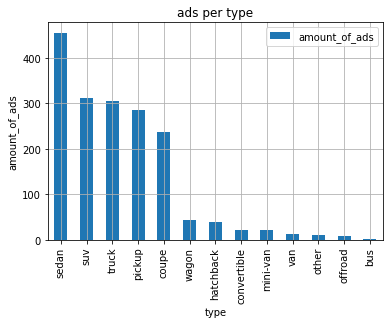

In [23]:
#https://pastebin.com/m9PiBqff notes
crank_correlate = crank.pivot_table(index = 'type', values='price', aggfunc=['mean'])
crank_correlate.columns = ['avg price']
crank_correlate_ads = crank.pivot_table(index = 'type', values='price', aggfunc=['count'])
crank_correlate.columns = ['avg']
crank_correlate_ads.columns = ['amount_of_ads']
crank_correlate_ads = crank_correlate_ads.sort_values(by='amount_of_ads',ascending=False)
crank_correlate['avg'] = crank_correlate['avg'].round(decimals=2)
crank_correlate_ads.plot(title='ads per type',y='amount_of_ads', kind='bar',grid=True).set_ylabel("amount_of_ads")
print(crank_correlate)

Trucks and sedans have the most ads

## Price factors

[What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.]

[Make use of correlation matrix and correlation plots]


Sedans

                     price  model_year  condition  cylinders  odometer  \
price             1.000000    0.716581   0.482081  -0.158107  0.598407   
model_year        0.716581    1.000000   0.479869  -0.407104  0.537990   
condition         0.482081    0.479869   1.000000  -0.226820  0.273373   
cylinders        -0.158107   -0.407104  -0.226820   1.000000 -0.311226   
odometer          0.598407    0.537990   0.273373  -0.311226  1.000000   
days_listed      -0.069850   -0.062986   0.062279   0.012239 -0.085419   
model_age        -0.712861   -0.997221  -0.483372   0.404630 -0.534864   
mileage_per_year  0.423198    0.423327   0.191024  -0.150286  0.616125   

                  days_listed  model_age  mileage_per_year  
price               -0.069850  -0.712861          0.423198  
model_year          -0.062986  -0.997221          0.423327  
condition            0.062279  -0.483372          0.191024  
cylinders            0.012239   0.404630         -0.150286  
odometer           

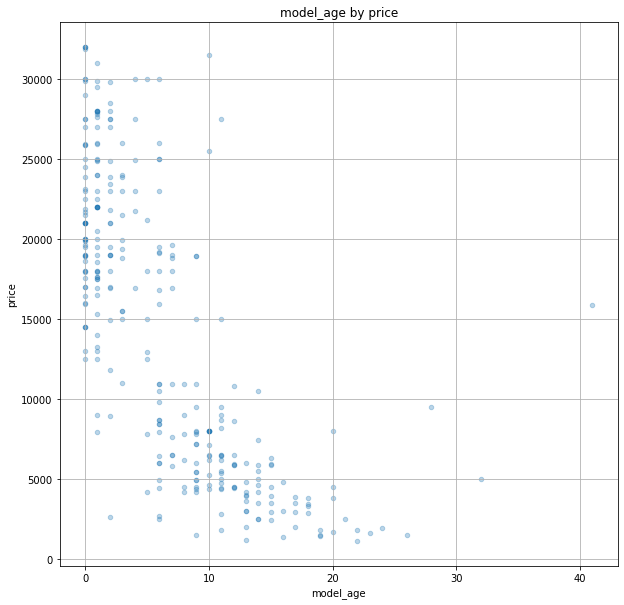

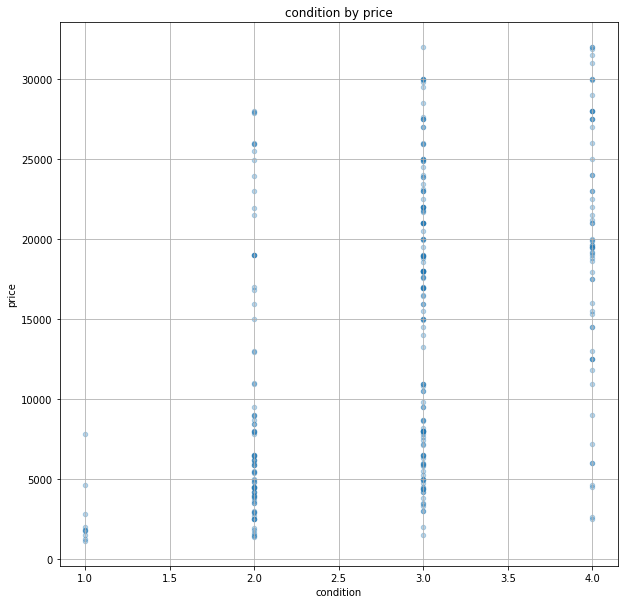

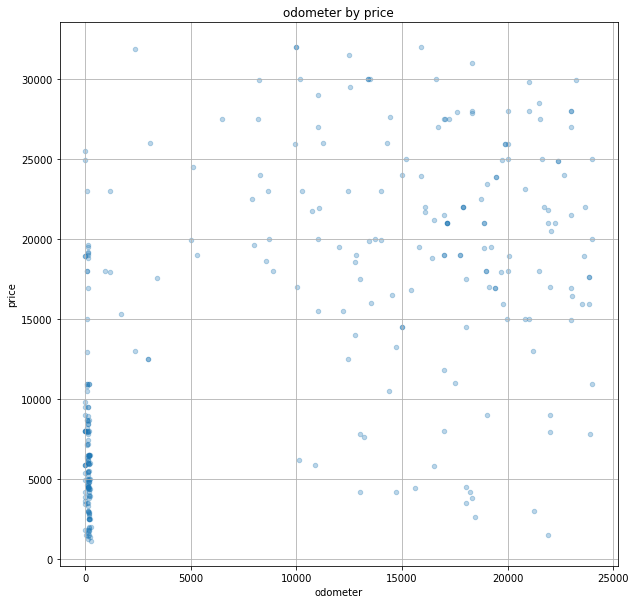

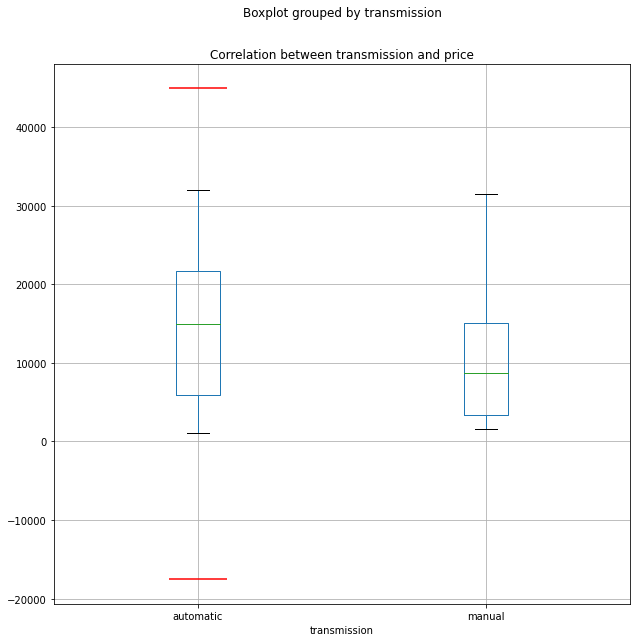

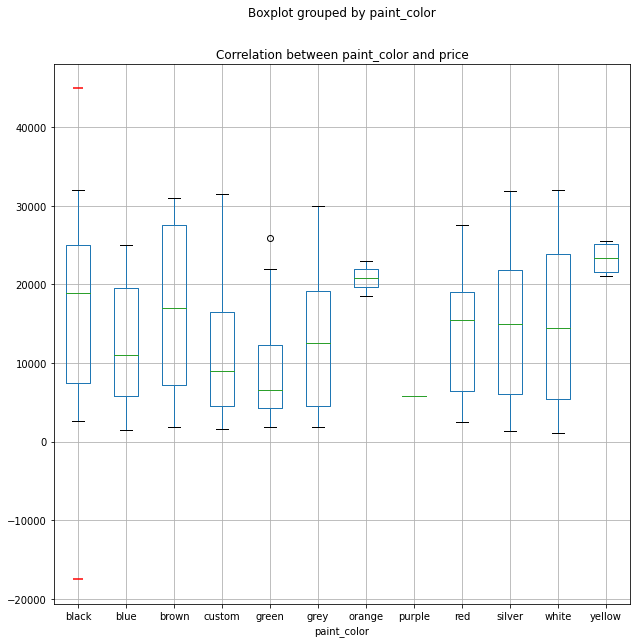


Suvs

                     price  model_year  condition  cylinders  odometer  \
price             1.000000    0.390066   0.331343   0.153326  0.398613   
model_year        0.390066    1.000000   0.248288  -0.288689  0.333406   
condition         0.331343    0.248288   1.000000   0.006750  0.148576   
cylinders         0.153326   -0.288689   0.006750   1.000000 -0.084440   
odometer          0.398613    0.333406   0.148576  -0.084440  1.000000   
days_listed       0.087114   -0.000573   0.081568   0.043236  0.088604   
model_age        -0.382212   -0.997162  -0.243095   0.289137 -0.330702   
mileage_per_year  0.256450    0.303826   0.113791  -0.086653  0.641486   

                  days_listed  model_age  mileage_per_year  
price                0.087114  -0.382212          0.256450  
model_year          -0.000573  -0.997162          0.303826  
condition            0.081568  -0.243095          0.113791  
cylinders            0.043236   0.289137         -0.086653  
odometer             

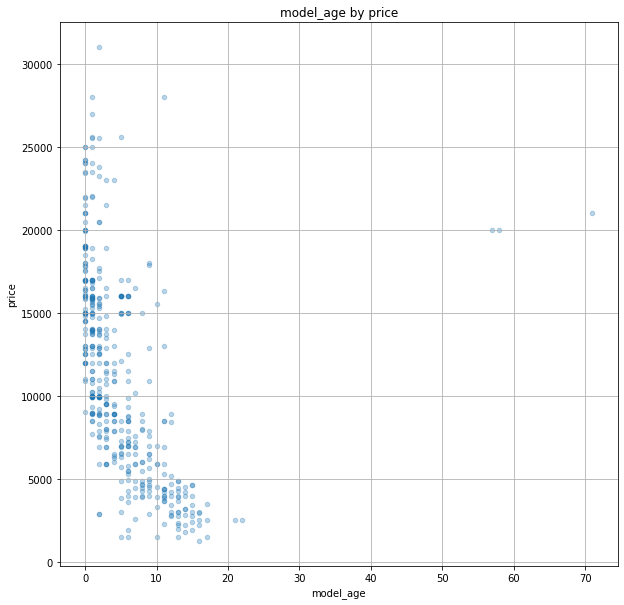

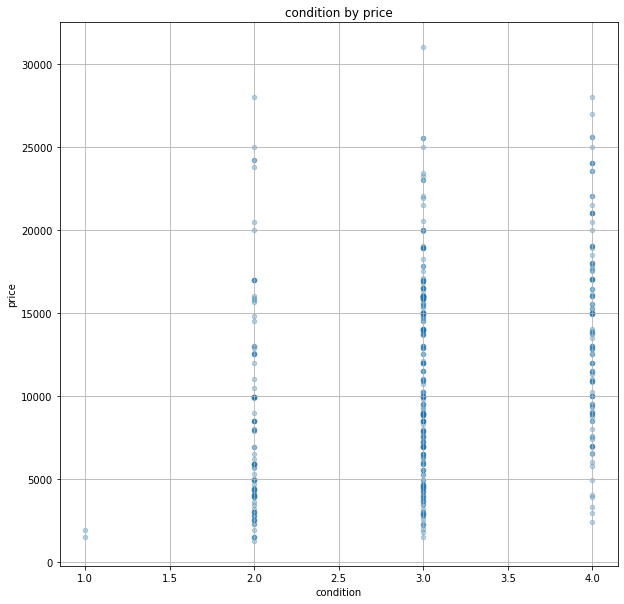

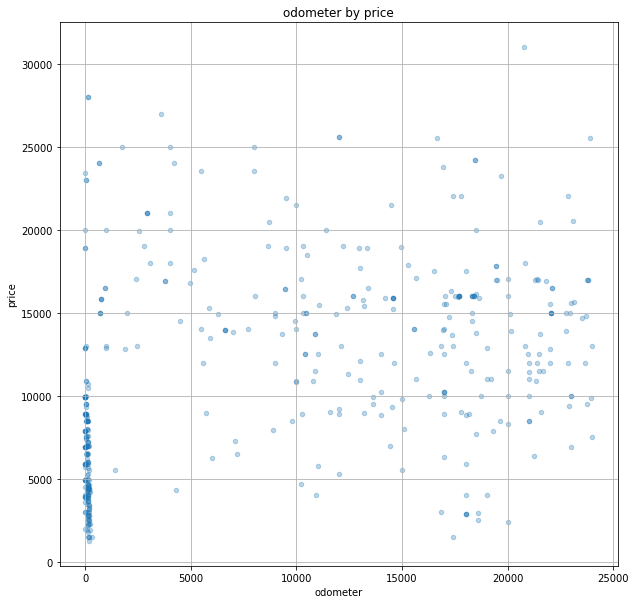

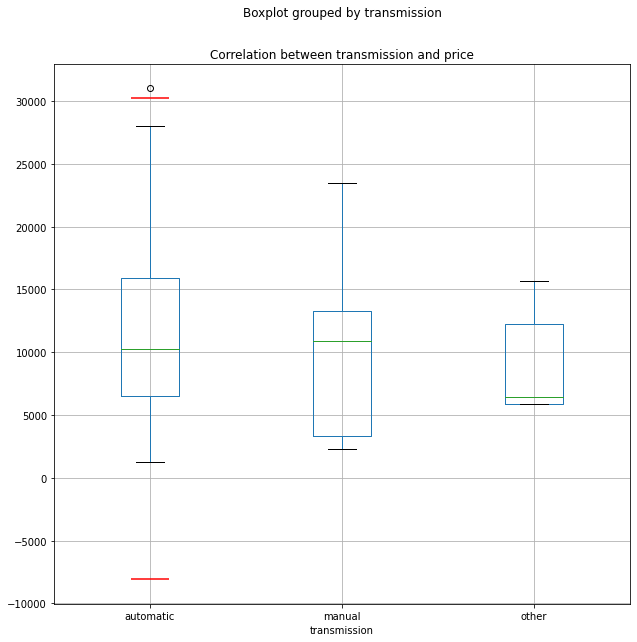

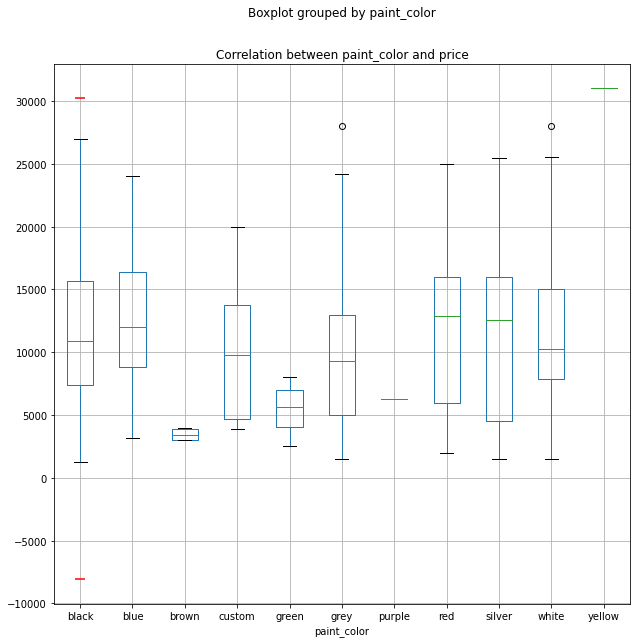

In [24]:
#https://pastebin.com/bWtCQHkQ notes
#https://pastebin.com/sQNq3cuZ
#https://pastebin.com/7VdKkL9Y

#https://pastebin.com/bWtCQHkQ notes
#https://pastebin.com/sQNq3cuZ
#https://pastebin.com/7VdKkL9Y
#https://pastebin.com/7bcHnBFD #50 TOTAL BY CATEGORY, NOT PER VALUE IN VALUE COUNT
 
just_sedan = crank.query('type == "suv"').reset_index(drop=True) #this 
just_suv = crank.query('type == "sedan"').reset_index(drop=True)
suv_transmissions = dict(just_suv['transmission'].value_counts())
sedan_transmissions = dict(just_sedan['transmission'].value_counts())

suv_paint_colors = dict(just_suv['paint_color'].value_counts())
sedan_paint_colors = dict(just_sedan['paint_color'].value_counts())
 
def box_pivoter(table,index_column,values_column='price'):
    #print(table[index_column].value_counts())
    table.boxplot(column=values_column, by=index_column, figsize=(10,10))
    Q1 = table[values_column].quantile(0.25) #Quartiles
    Q3 = table[values_column].quantile(0.75)
    IQR = Q3 - Q1
    plt.title(f'Correlation between {index_column} and {values_column}')
    plt.hlines(y=Q3 + 1.5*IQR, xmin=0.9, xmax=1.1, color='red')
    plt.hlines(y=Q1 - 1.5*IQR, xmin=0.9, xmax=1.1, color='red')  
    plt.show()
 
 
def scatter_pivot(table,index_column,values_column='price'):
    table[values_column] = table[values_column].round(decimals=2)
    table.plot(x=index_column, y=values_column, kind='scatter', alpha=0.3, grid=True, figsize=(10,10), title=f'{index_column} by {values_column}')
    plt.show()
 
 
def scatter_or_box(df):
    df_column_list = ['price', 'model_age','condition','odometer','transmission','paint_color']
    #print(df_column_list)
    for column in df_column_list:
        if column != 'price':
            if column == 'paint_color' or column == 'transmission':
                box_pivoter(df, column, df_column_list[0])
            else:
                scatter_pivot(df, column, df_column_list[0])
 
print()                
print('Sedans')
print()         
print(just_sedan.corr())
print() 
scatter_or_box(just_sedan)
print() 
print('Suvs')
print()   
print(just_suv.corr())
print() 
scatter_or_box(just_suv)

There is a clear correlation between price and model_age. There is a clear correlation between price and condition. There is a clear correlation between price and odometer. We need a new table for transmission and price. We need to change the columns and round price. The categories must have at least 50 ads, so only automatic transmissions are left after dropping them. Price drops off as models get older. Cars are less expensive with less mileage, likely due to needing extensive tuneups or trips to the mechanic. Only automatic transmission has ads above 50. Black and White cars cost the most.   

## General conclusion

[List your important conclusions in this final section, make sure they include those that led you to the way you processed and analyzed the data. Cover the missing values, duplicates, outliers and possible reasons and solutions for problematic artifacts that you had to address. Don't forget to remove all bracketed comments before submitting your project.]

Price of cars tends to decrease over time. However, car prices tend to be higher, as long as the condition is good or higher, has zero mileage, automatic transmission over manual or other, and is black and white over color.